In [1]:
import numpy as np
import json

from bd2dst3pi.locations import loc
#from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle, plot_x_list_ys

from uncertainties import ufloat, unumpy, umath

Welcome to JupyROOT 6.22/02


In [2]:
l_BDT = [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4]
lS = []
lB = []
lSplusB = []
squareRootlSplusB = []
for i, BDT in enumerate(l_BDT):   
    with open(f'{loc.JSON}/tau_M_B_BDT_sup_{BDT}_params.json', 'r') as f:
        tau_M_B_BDT_params = json.load(f)
    lB.append(ufloat(tau_M_B_BDT_params[f'n_sig_ga|{BDT}'],tau_M_B_BDT_params[f'n_sig_ga|{BDT}_err']))
    
    with open(f'{loc.JSON}/B0_M_BDT_sup_{BDT}_params.json', 'r') as f:
        B0_M_BDT_params = json.load(f)
    lB[i] += ufloat(B0_M_BDT_params[f'n_bkg|{BDT}'],B0_M_BDT_params[f'n_bkg|{BDT}_err'])
    lB[i] += ufloat(B0_M_BDT_params[f'n_bkg2|{BDT}'],B0_M_BDT_params[f'n_bkg2|{BDT}_err'])
    
    lS.append(ufloat(B0_M_BDT_params[f'n_sig|{BDT}'],B0_M_BDT_params[f'n_sig|{BDT}_err']))
    lSplusB.append(lS[i]+lB[i])
    squareRootlSplusB.append(umath.sqrt(lSplusB[i]))
    
lS = np.array(lS)
lB = np.array(lB)

In [3]:
print(lSplusB)
# for BDT = -0.2: 277851

[277850.0222854805+/-2025.125859611983, 224946.84771956957+/-1910.4068797893956, 172185.32927862636+/-1356.6807033865373, 118408.04870782881+/-1134.60269697216, 68013.28948162458+/-864.8135397634175, 28025.60776079863+/-530.7381057110604, 6828.264416605125+/-109.69608455122587]


In [4]:
signal_purity = lS/lSplusB
signal_significance = lS/squareRootlSplusB
FoM = signal_purity*signal_significance

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


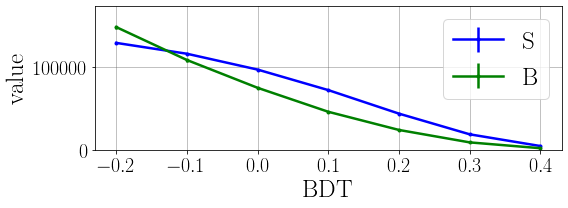

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM/BDT_vs_S_B.pdf


In [5]:
plot_x_list_ys(l_BDT, [lS,lB], 'BDT', 
               ['S','B'],
               name_folder='data_strip_cutDeltaM')

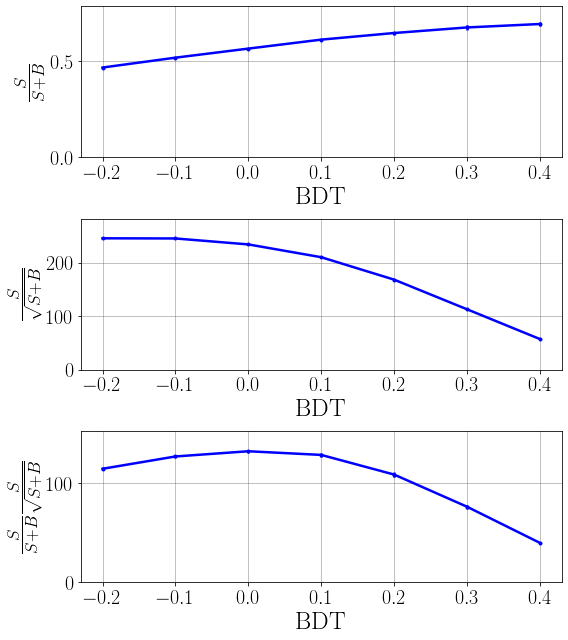

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM/BDT_vs_signal_purity_signal_significance_FoM.pdf


In [6]:
plot_x_list_ys(l_BDT, [[signal_purity],[signal_significance],[FoM]], 'BDT', 
               [['signal purity'],['signal significance'],['FoM']],
               [['$\\frac{S}{S+B}$'],['$\\frac{S}{\\sqrt{S+B}}$'],['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='data_strip_cutDeltaM')